In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

`shuffle`, `normalize` are unused but can be investigated further

In [118]:
N = 1000
t_max = 100000
f = np.empty((t_max, N)) # fitness value per species per timestep
f[0,:] = np.random.random(N)

def update(f, t=0, shuffle=False, normalize=False):
    f2 = f[t].copy()
    i = np.argmin(f2) # minimum
    i1 = (i - 1) % N # right neighbour
    i2 = (i + 1) % N # left neighbour
    if shuffle:
        indices = [j for j in range(N) if j not in [i, i1, i2]]
        f2 = list(f2[indices])
        for _ in range(3):
            # during this stage |f2| < N
            i = np.random.randint(0,len(f2))
            f2.insert(i, np.random.random())

        f2 = np.array(f2)

    else:
        f2[[i, i1, i2]] = np.random.random(3)

    if normalize:
        f2 = (f2 - np.min(f2)) * (np.max(f2) - np.min(f2))
    f[t+1,:] = f2

for t in range(t_max-1):
    update(f, t)

Text(0,0.5,'time')

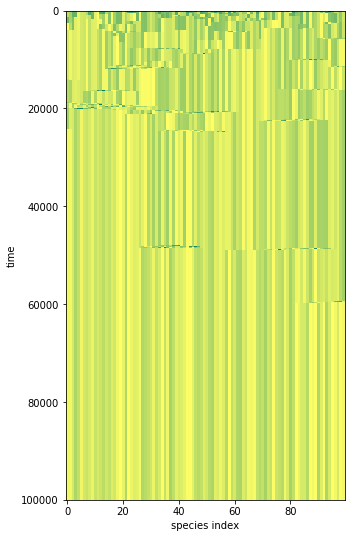

In [119]:
# fig = plt.figure(figsize=(9,9))
fig = plt.figure(figsize=(5,9))
i_max = 100
plt.imshow(np.array(f)[:,:i_max], cmap='summer', aspect='auto')
plt.xlabel('species index')
plt.ylabel('time')
# plt.semilogy()

Text(0.5,0,'species index (ordered by fitness)')

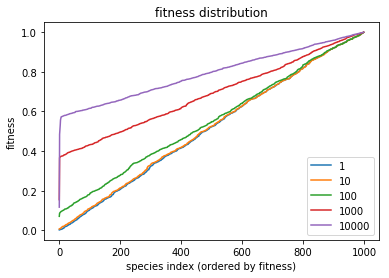

In [107]:
for i in np.logspace(0, np.log10(t_max), np.log10(t_max), endpoint=False, dtype=int):
    i = int(i)
    plt.plot(sorted(f[i]), label=i)
plt.legend()
plt.title('fitness distribution')
plt.ylabel('fitness')
plt.xlabel('species index (ordered by fitness)')

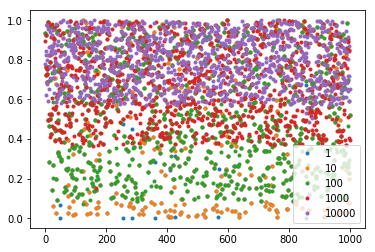

In [114]:
for i in np.logspace(0, np.log10(t_max), np.log10(t_max), endpoint=False, dtype=int):
    i = int(i)
    plt.plot(f[i], '.', label=i)
plt.legend()

Text(0,0.5,'time')

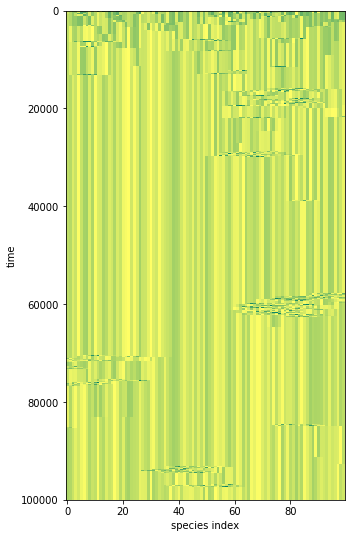

In [120]:
N = 1000
t_max = 100000
f = np.empty((t_max, N)) # fitness value per species per timestep
f[0,:] = np.random.random(N)

def update(f, t=0):
    f2 = f[t].copy()
    i = np.argmin(f2) # minimum
    i1 = (i - 1) % N # right neighbour
    i2 = (i + 1) % N # left neighbour
    f2[[i, i1, i2]] = np.random.random(3) # update species
    f[t+1,:] = f2

for t in range(t_max-1):
    update(f, t)


# plot
fig = plt.figure(figsize=(5,9))
i_max = 100
plt.imshow(np.array(f)[:,:i_max], cmap='summer', aspect='auto')
plt.xlabel('species index')
plt.ylabel('time')

## Using networkx

Text(0, 0.5, 'Time')

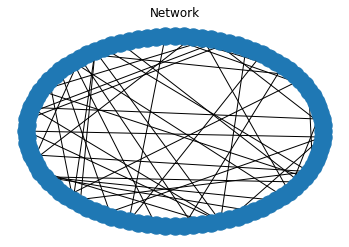

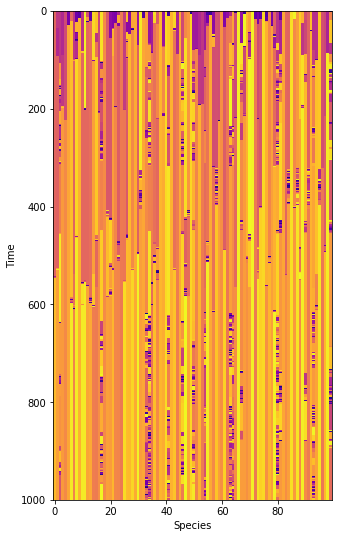

In [17]:
N = 100
t_max = 1000
f = np.empty((t_max, N)) # fitness value per species per timestep
f[0,:] = np.random.random(N)

# Create graph
g = nx.erdos_renyi_graph(N, 0.01)
#g = nx.watts_strogatz_graph(N, 3, 0.1)
#g = nx.barabasi_albert_graph(N, 1)

# perform Back-Sneppen
for t in range(t_max-1):
    i = np.argmin(f[t])
    idx = list(g[i])
    
    f[t+1] = f[t]
    f[t+1, i] = np.random.random()
    f[t+1, idx] = np.random.random(len(idx))
    
# plot
fig, ax = plt.subplots()
nx.draw_circular(g, with_labels=False)
ax.set_title("Network")

fig, ax = plt.subplots(figsize=(5,9))
ax.imshow(f[:,:], cmap="plasma", aspect="auto")
ax.set_xlabel("Species")
ax.set_ylabel("Time")